# IBM HR Data Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('kaggle_IBM_data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Look into the unique values of each variables.

In [4]:
for column in df.columns:
    print({column: df[column].nunique()})

{'Age': 43}
{'Attrition': 2}
{'BusinessTravel': 3}
{'DailyRate': 886}
{'Department': 3}
{'DistanceFromHome': 29}
{'Education': 5}
{'EducationField': 6}
{'EmployeeCount': 1}
{'EmployeeNumber': 1470}
{'EnvironmentSatisfaction': 4}
{'Gender': 2}
{'HourlyRate': 71}
{'JobInvolvement': 4}
{'JobLevel': 5}
{'JobRole': 9}
{'JobSatisfaction': 4}
{'MaritalStatus': 3}
{'MonthlyIncome': 1349}
{'MonthlyRate': 1427}
{'NumCompaniesWorked': 10}
{'Over18': 1}
{'OverTime': 2}
{'PercentSalaryHike': 15}
{'PerformanceRating': 2}
{'RelationshipSatisfaction': 4}
{'StandardHours': 1}
{'StockOptionLevel': 4}
{'TotalWorkingYears': 40}
{'TrainingTimesLastYear': 7}
{'WorkLifeBalance': 4}
{'YearsAtCompany': 37}
{'YearsInCurrentRole': 19}
{'YearsSinceLastPromotion': 16}
{'YearsWithCurrManager': 18}


We notice that 'EmployeeCount', 'Over18', and 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us in this analysis. So we are going to drop those columns.

In [5]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [6]:
space = [0 for k in range(df.shape[0])]
for i, j in enumerate(df["JobSatisfaction"]):
    if j == 1 or j == 2:
        space[i] = 0
    else:
        space[i] = 1
df["SatisfactionCategorical"] = space
df = df.drop(["JobSatisfaction"], axis="columns")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SatisfactionCategorical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,0


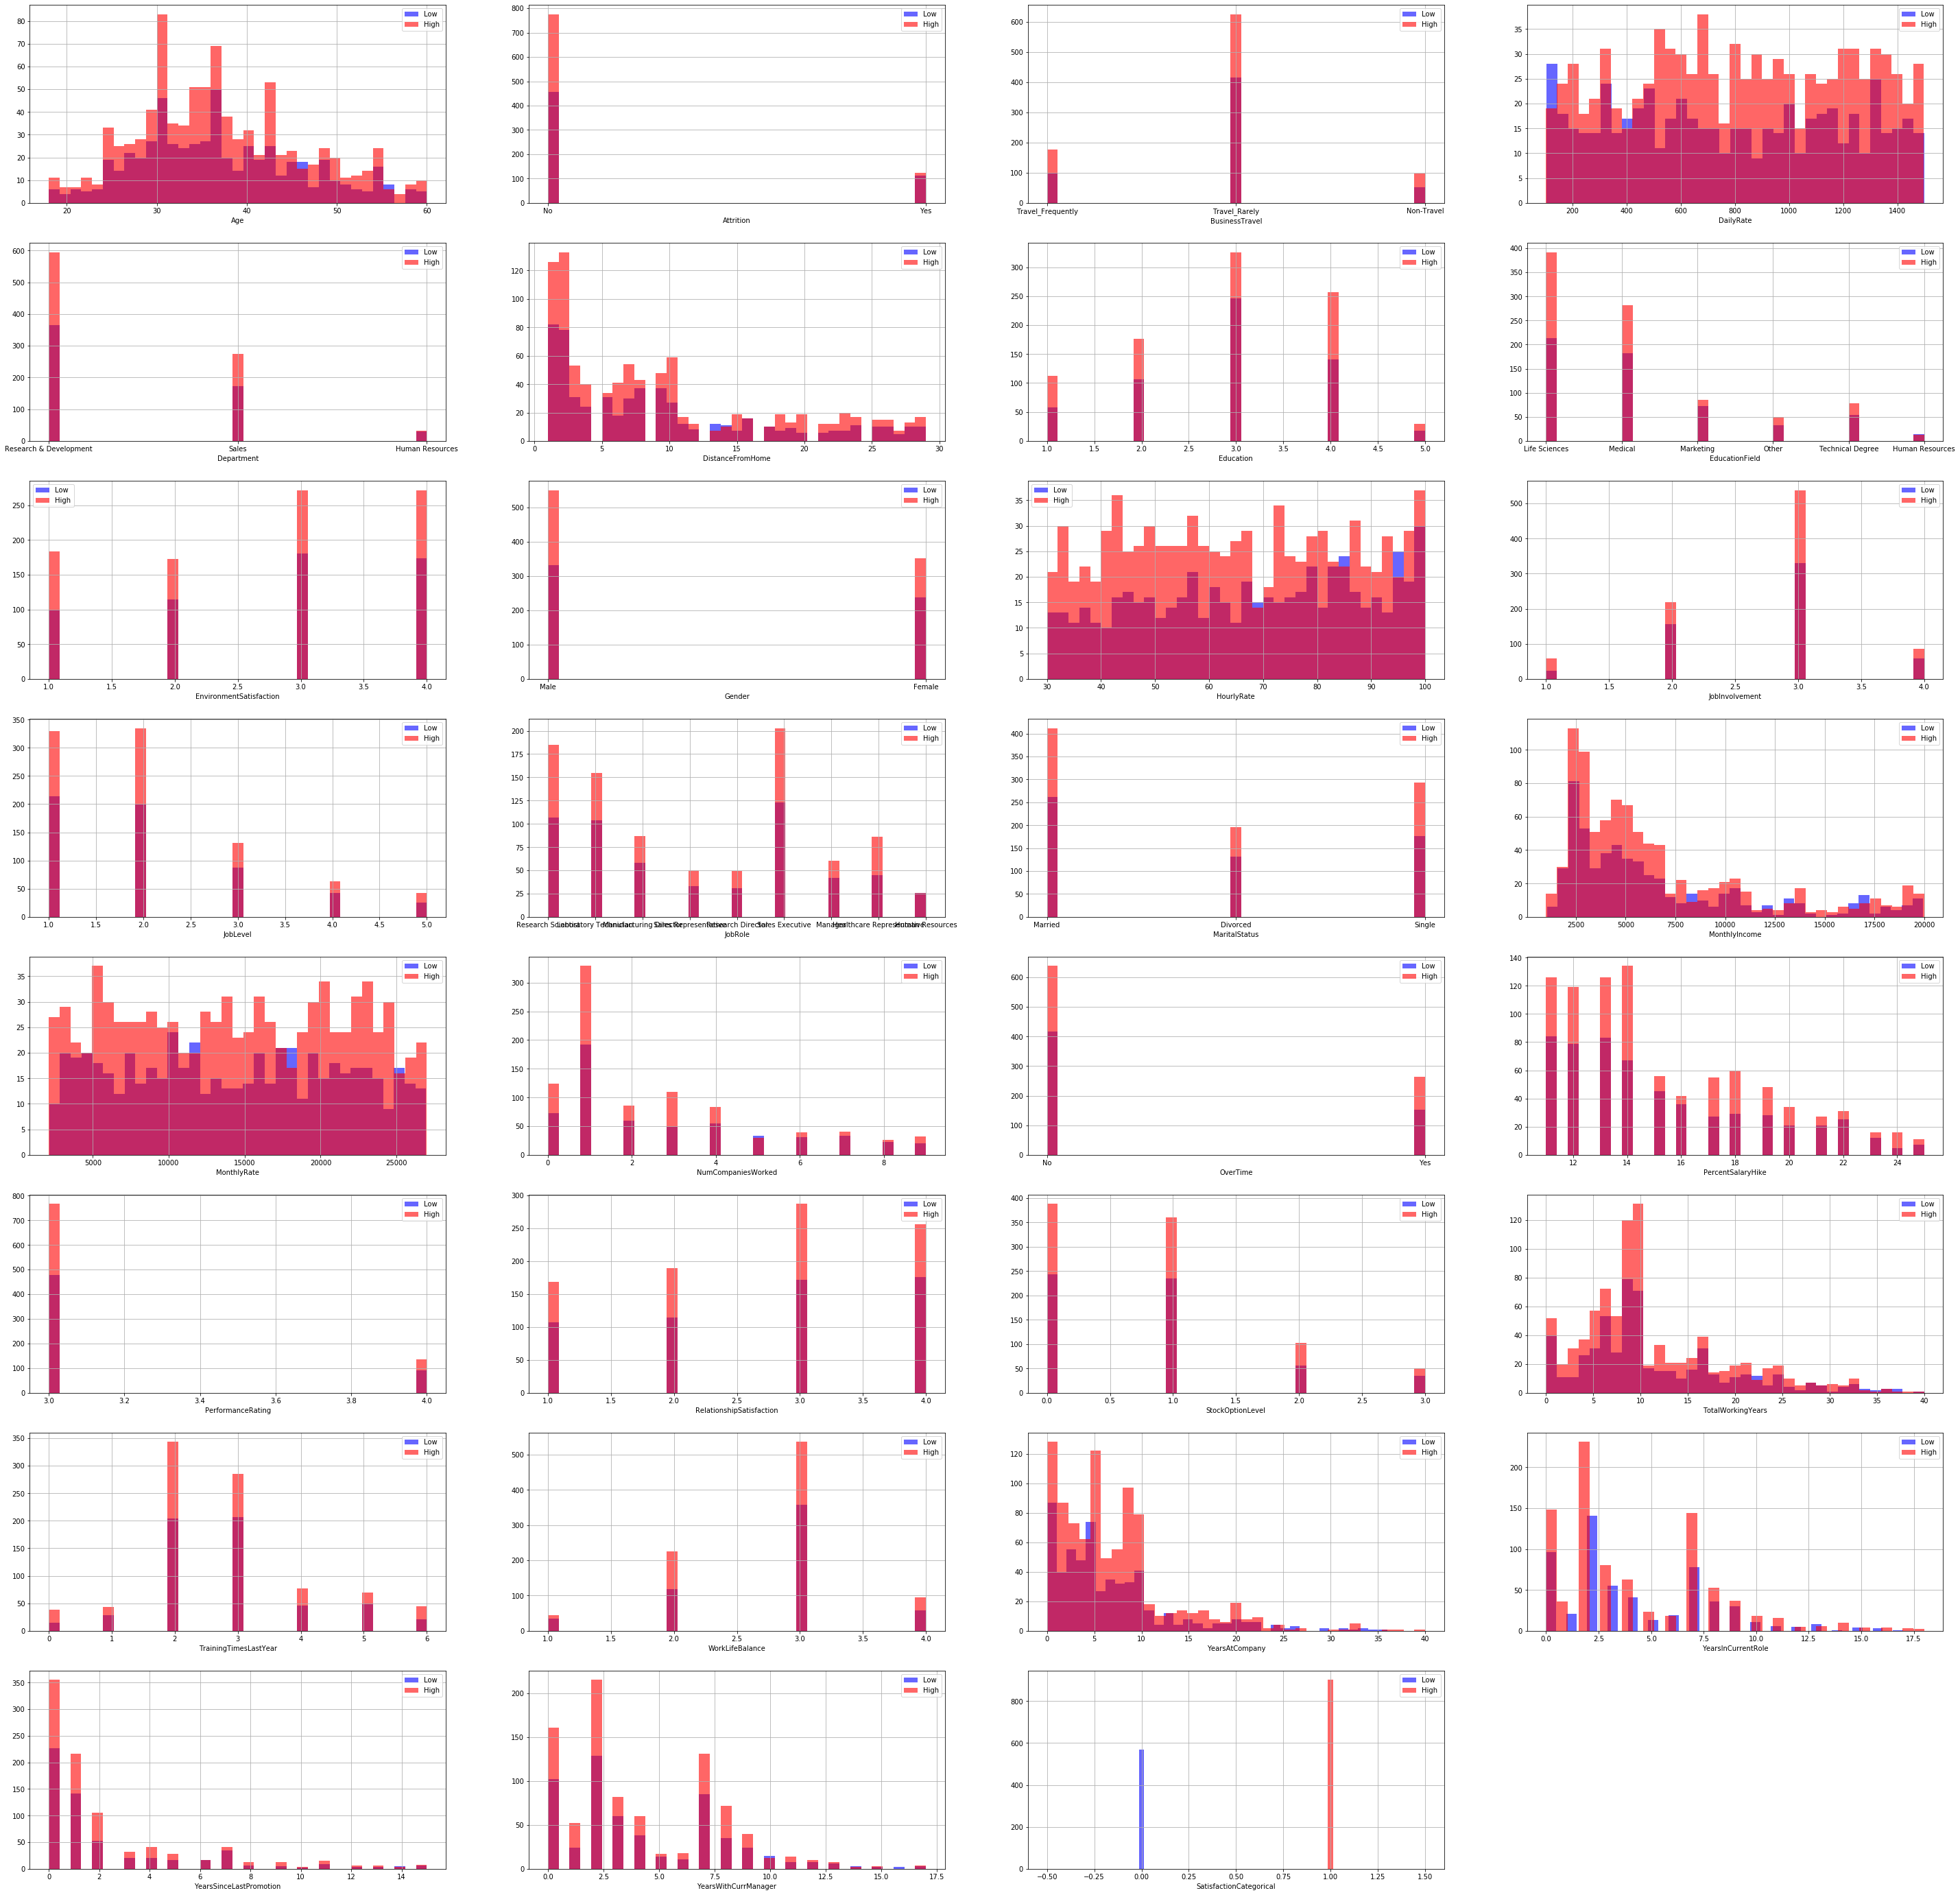

In [7]:
plt.figure(figsize=(50, 50))

for i, column in enumerate(df.columns):
    plt.subplot(8, 4, i+1)
    df[df["SatisfactionCategorical"] == 0][column].hist(bins=35, color='blue', label='Low', alpha=0.6)
    df[df["SatisfactionCategorical"] == 1][column].hist(bins=35, color='red', label='High', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

It seems that BusinessTravel, Education, EnvironmentSatisfaction, Gender, MaritalStatus, MonthlyRate, OverTime, RelationshipSatisfaction, and YearsInCurrentRole features don't have big impact on the detrmination of SatisfactionCategorical of employees.

In [8]:
df = df.drop(['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'Gender', 'MaritalStatus', 'MonthlyRate', 'OverTime', 'RelationshipSatisfaction', 'YearsInCurrentRole', 'JobRole'], axis="columns")
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,EducationField,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,SatisfactionCategorical
0,41,Yes,1102,Sales,1,Life Sciences,94,3,2,5993,...,11,3,0,8,0,1,6,0,5,1
1,49,No,279,Research & Development,8,Life Sciences,61,2,2,5130,...,23,4,1,10,3,3,10,1,7,0
2,37,Yes,1373,Research & Development,2,Other,92,2,1,2090,...,15,3,0,7,3,3,0,0,0,1
3,33,No,1392,Research & Development,3,Life Sciences,56,3,1,2909,...,11,3,0,8,3,3,8,3,0,1
4,27,No,591,Research & Development,2,Medical,40,3,1,3468,...,12,3,1,6,3,3,2,2,2,0


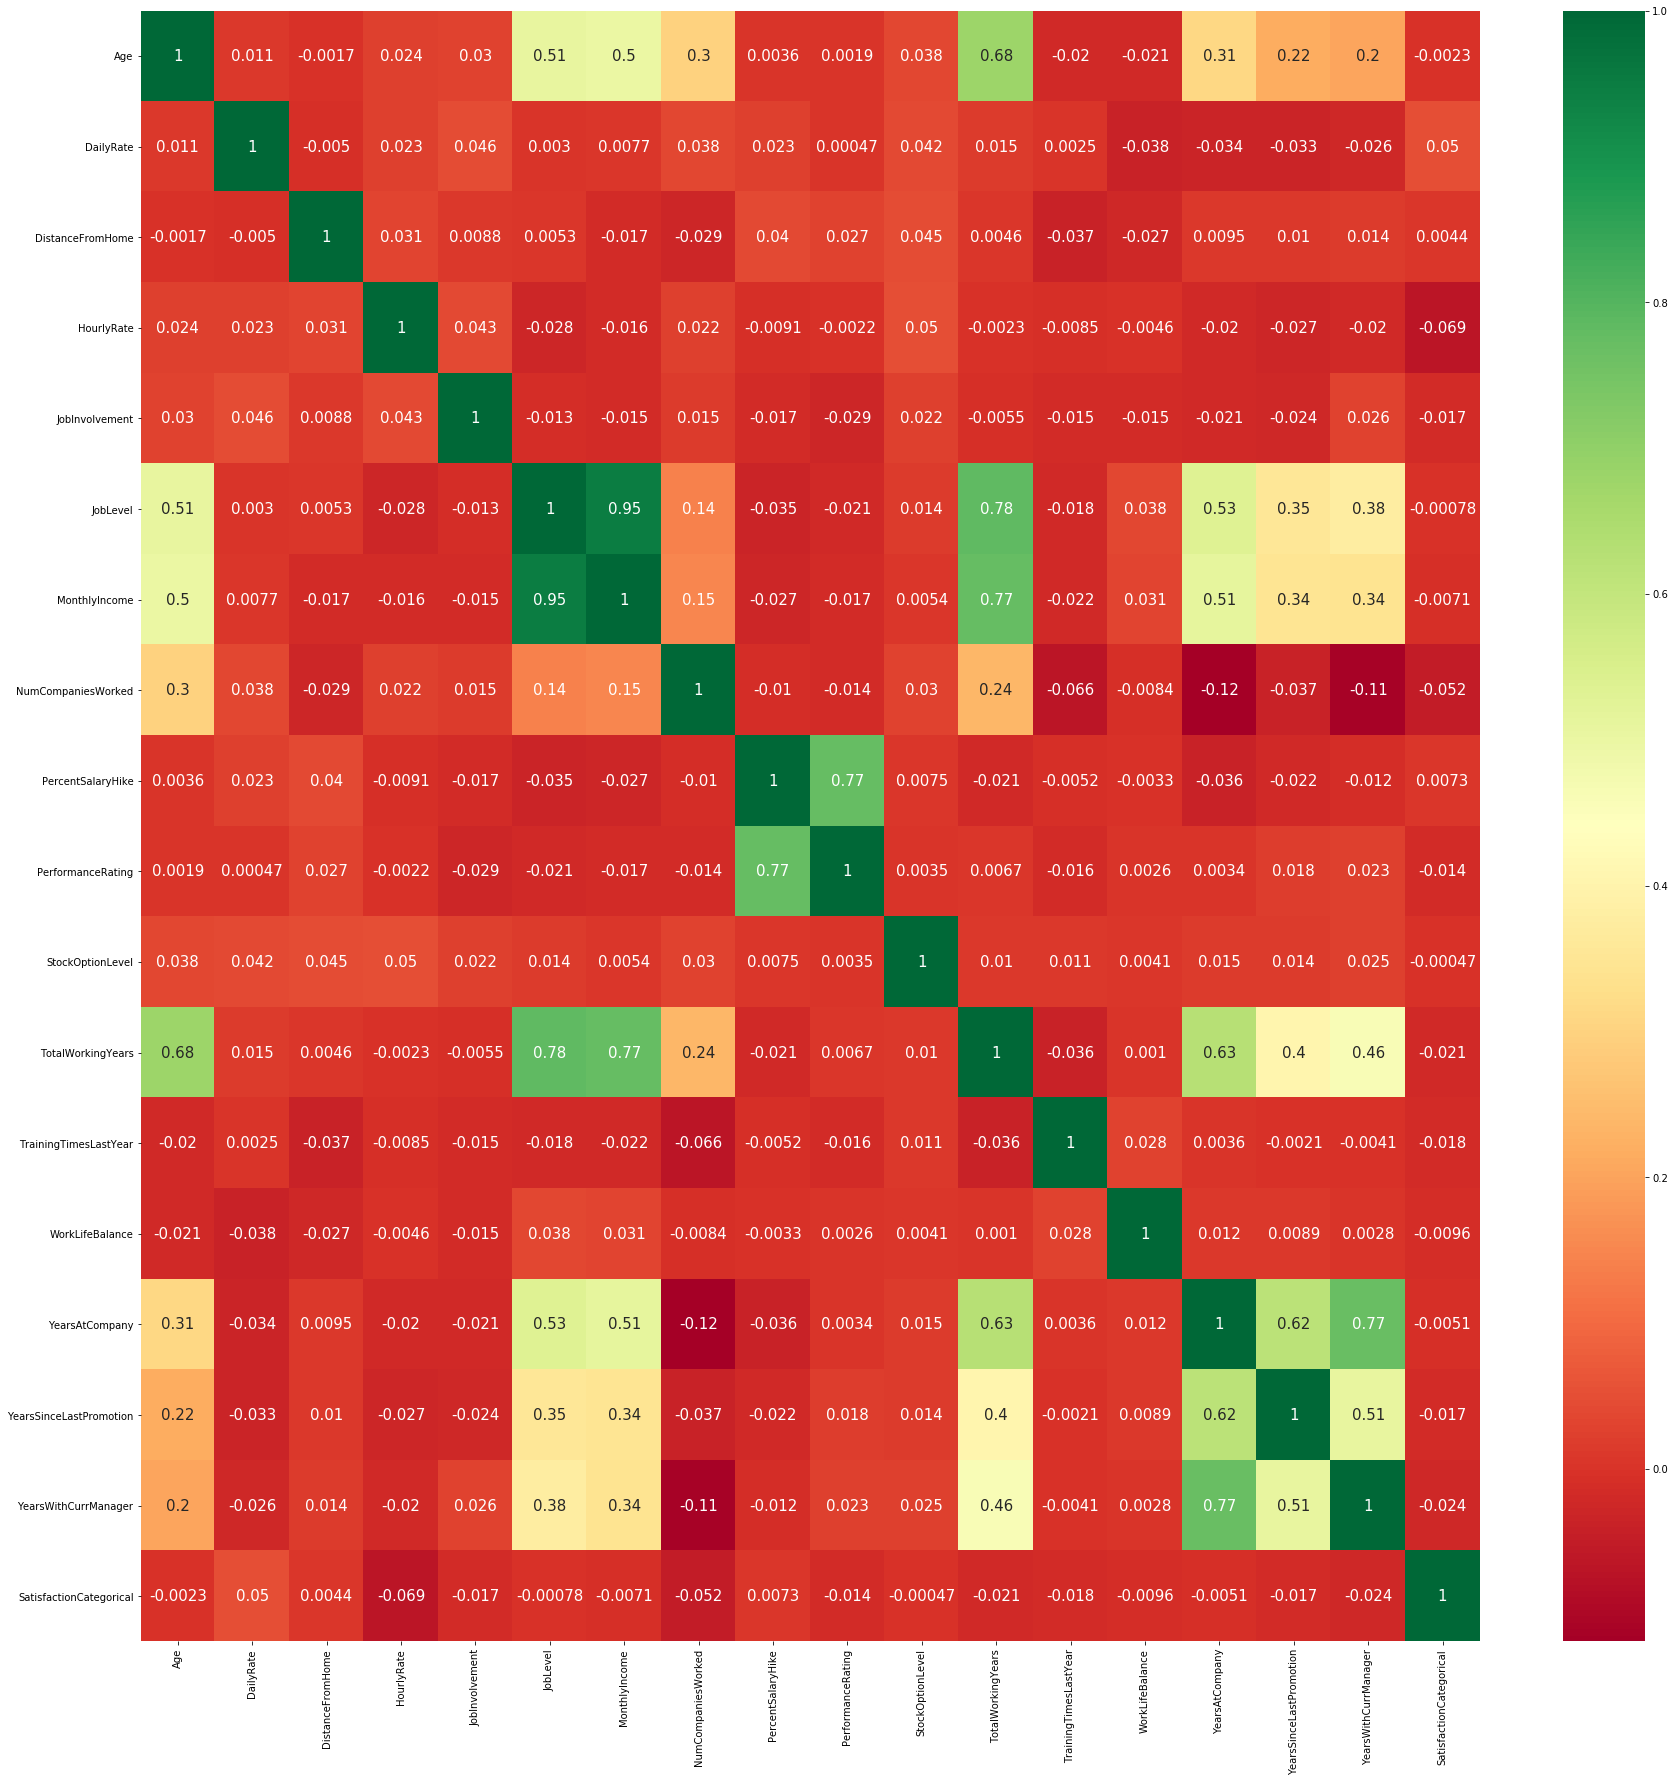

In [16]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [10]:
dummy_col = ['Attrition', 'Department', 'EducationField', 'JobInvolvement']
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   HourlyRate                         1470 non-null   int64
 4   JobLevel                           1470 non-null   int64
 5   MonthlyIncome                      1470 non-null   int64
 6   NumCompaniesWorked                 1470 non-null   int64
 7   PercentSalaryHike                  1470 non-null   int64
 8   PerformanceRating                  1470 non-null   int64
 9   StockOptionLevel                   1470 non-null   int64
 10  TotalWorkingYears                  1470 non-null   int64
 11  TrainingTimesLastYear              1470 non-null   int64
 12  WorkLifeBalance     

In [12]:
X = data.drop('SatisfactionCategorical', axis=1)
y = data.SatisfactionCategorical
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.652501
         Iterations 5
                                 Results: Logit
Model:                  Logit                      Pseudo R-squared:    0.022    
Dependent Variable:     SatisfactionCategorical    AIC:                 1972.3536
Date:                   2020-05-11 17:06           BIC:                 2115.2651
No. Observations:       1470                       Log-Likelihood:      -959.18  
Df Model:               26                         LL-Null:             -981.11  
Df Residuals:           1443                       LLR p-value:         0.015625 
Converged:              1.0000                     Scale:               1.0000   
No. Iterations:         5.0000                                                   
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------

In [11]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111, stratify=y)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

print_score(logreg, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(logreg, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 60.88%
_______________________________________________
Classification Report:	Precision Score: 62.30%
			Recall Score: 91.68%
			F1 score: 74.19%
_______________________________________________
Confusion Matrix: 
 [[ 55 400]
 [ 60 661]]

Test Result:
Accuracy Score: 60.54%
_______________________________________________
Classification Report:	Precision Score: 61.94%
			Recall Score: 92.22%
			F1 score: 74.11%
_______________________________________________
Confusion Matrix: 
 [[ 12 102]
 [ 14 166]]



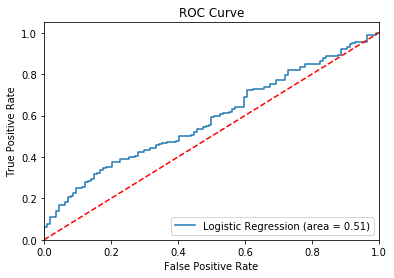

In [14]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_std))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_std)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()